# Evaluation of a model that doesn't use BPD

In [22]:
from pathlib import PurePath

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, auc, roc_curve, precision_recall_curve
import seaborn as sns

In [23]:
output_dir = './figure_panels/'
nb_save_prefix = f'{output_dir}2.3-without-bpd-model:'

In [24]:
# Read in top K subgroup predictions
results_dir = '../results/deep_mtl/supplementary_variants/without_bpd/subgroup_discovery/'
top_k_preds = pd.read_csv(PurePath(results_dir).joinpath('top_k_subgroup_predictions.csv')).set_index('row_id')

In [25]:
# Plot palette
all_colors = {
    'bpd_any': '#4e79a7',
    'rop_any': '#76b7b2',
    'ivh_any': '#f28e2b',
    'nec_any': '#e15759'}

outcome_colors = {k: v for k,v in all_colors.items() if k in top_k_preds.outcome.unique()}
outcome_upper_colors = {k.rstrip('_any').upper(): v for k, v in outcome_colors.items()}

In [26]:
subgroup_metric_df = top_k_preds.query('evaluation_metric == "AUROC"')

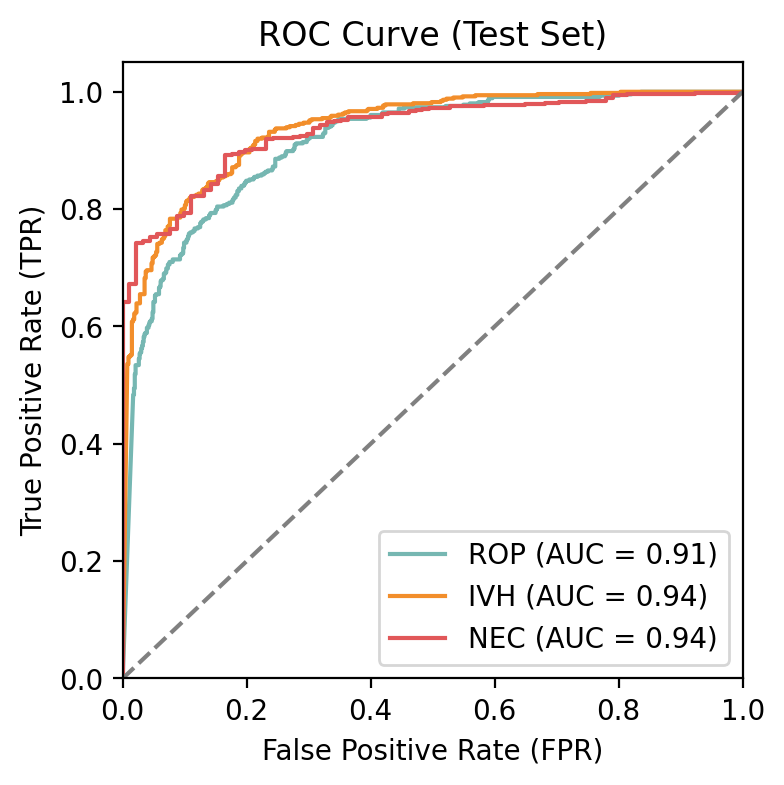

In [27]:
plt.figure(figsize=(4, 4), dpi=200)
split_df = subgroup_metric_df.query('dataset == "kfold_test"').copy()
split_df.outcome = split_df.outcome.str.rstrip('_any').str.upper()
plot_title = 'ROC Curve (Test Set)'
for o, color in outcome_upper_colors.items():
    outcome_df = split_df.query('outcome == @o')
    y_true = outcome_df['true_vals']
    y_prob = outcome_df['preds']

    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.plot(fpr, tpr, label=f'{o} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(plot_title)
plt.legend(loc="lower right")
plt.savefig(f'{nb_save_prefix}top_subgroup_roc_test.pdf', bbox_inches='tight')

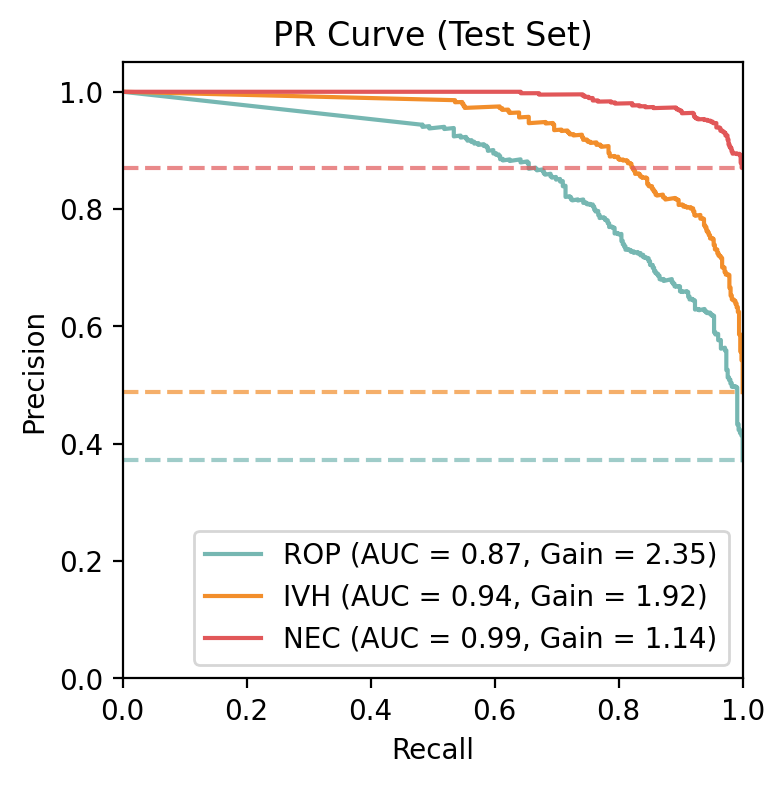

In [28]:
plt.figure(figsize=(4, 4), dpi=200)
split_df = subgroup_metric_df.query('dataset == "kfold_test"').copy()
split_df.outcome = split_df.outcome.str.rstrip('_any').str.upper()
plot_title = 'PR Curve (Test Set)'
for o, color in outcome_upper_colors.items():
    outcome_df = split_df.query('outcome == @o')
    y_true = outcome_df['true_vals']
    y_prob = outcome_df['preds']

    # Calculate prevalence (proportion of positive class)
    prevalence = np.sum(y_true) / len(y_true)

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob, pos_label=1)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{o} (AUC = {pr_auc:.2f}, Gain = {pr_auc/prevalence:.2f})', color=color)

    # Plot no-skill line for prevalence
    plt.axhline(y=prevalence, color=color, linestyle='--', alpha=0.7)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(plot_title)
plt.legend(loc="lower right")
plt.savefig(f'{nb_save_prefix}top_subgroup_pr_test.pdf', bbox_inches='tight')

## Evaluation of Top K subgroups on the holdout validation set

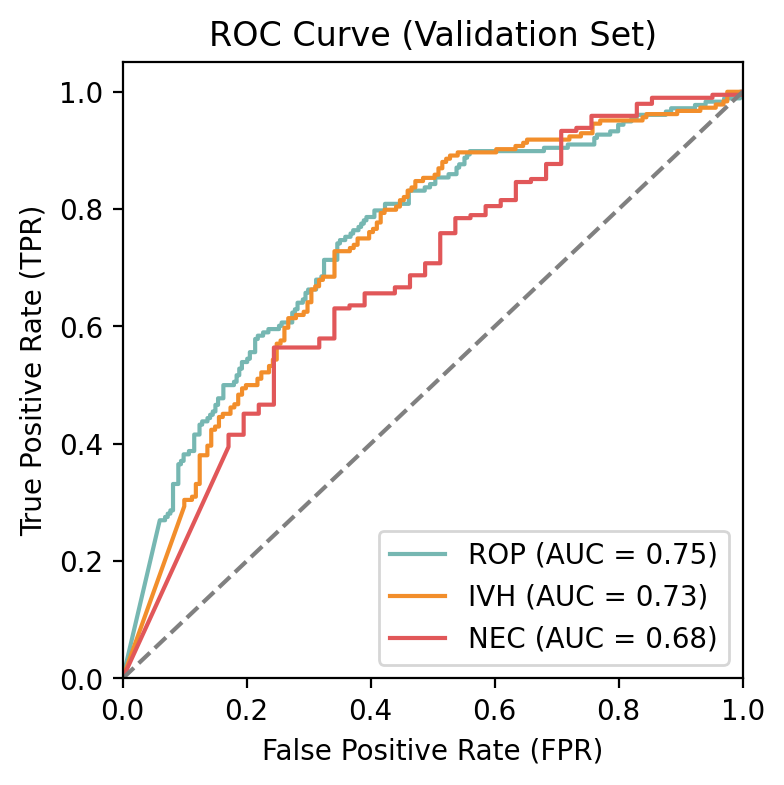

In [29]:
plt.figure(figsize=(4, 4), dpi=200)
split_df = subgroup_metric_df.query('dataset == "holdout_validation"').copy()
split_df.outcome = split_df.outcome.str.rstrip('_any').str.upper()
plot_title = 'ROC Curve (Validation Set)'
for o, color in outcome_upper_colors.items():
    outcome_df = split_df.query('outcome == @o')
    y_true = outcome_df['true_vals']
    y_prob = outcome_df['preds']

    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.plot(fpr, tpr, label=f'{o} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(plot_title)
plt.legend(loc="lower right")
plt.savefig(f'{nb_save_prefix}top_subgroup_roc_valid.pdf', bbox_inches='tight')

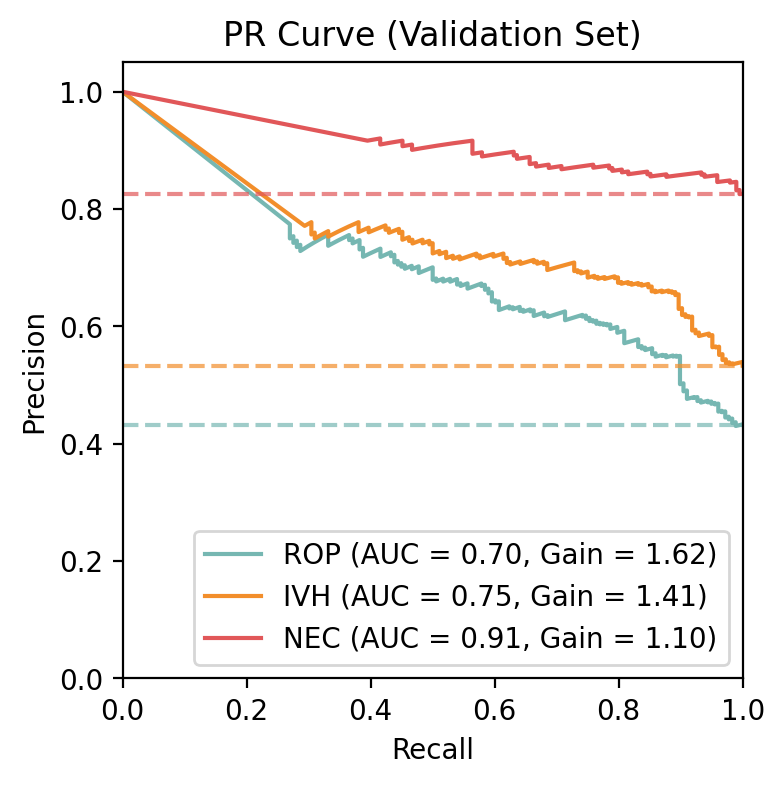

In [30]:
plt.figure(figsize=(4, 4), dpi=200)
split_df = subgroup_metric_df.query('dataset == "holdout_validation"').copy()
split_df.outcome = split_df.outcome.str.rstrip('_any').str.upper()
plot_title = 'PR Curve (Validation Set)'
for o, color in outcome_upper_colors.items():
    outcome_df = split_df.query('outcome == @o')
    y_true = outcome_df['true_vals']
    y_prob = outcome_df['preds']

    # Calculate prevalence (proportion of positive class)
    prevalence = np.sum(y_true) / len(y_true)

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{o} (AUC = {pr_auc:.2f}, Gain = {pr_auc/prevalence:.2f})', color=color)

    # Plot no-skill line for prevalence
    plt.axhline(y=prevalence, color=color, linestyle='--', alpha=0.7)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(plot_title)
plt.legend(loc="lower right")
plt.savefig(f'{nb_save_prefix}top_subgroup_pr_valid.pdf', bbox_inches='tight')